In [1]:
%load_ext autoreload
%autoreload 2

# some magic to be able to import local module into jupyter notebook
# https://mg.readthedocs.io/importing-local-python-modules-from-jupyter-notebooks/index.html
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from dynamite_src import gauss_hermite_kinematics as ghk
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [29]:
np.random.seed(175346)

# setup velocity array
nv = 1000
vedg = np.linspace(-5, 5, nv+1)
v = (vedg[:-1] + vedg[1:])/2.
dv = v[1] - v[0]

# make true LOSVD
n_losvds, n_cmps = 10, 3
losvds = np.zeros((n_losvds, nv))
for i in range(n_losvds):
    weights = np.random.uniform(0.1, 1, n_cmps)
    means = np.random.uniform(-4, 4, n_cmps)
    sigmas = np.random.uniform(0.1, 1, n_cmps)    
    gmm = ghk.GauusianMixture1D(weights=weights,
                                means=means,
                                sigmas=sigmas)
    losvds[i,:] = gmm.evaluate(v)
    
orblib = ghk.Histogram(xedg=vedg, y=losvds, normalise=True)

In [30]:
gauherm = ghk.GaussHermite()

old_file = '../datafiles/triaxschwarz_example/infil/kin_data.dat'
new_file = '../datafiles/gauss_hermite_kins.ecvs'

dat_old = gauherm.read_file_old_format(old_file)
gauherm.convert_file_from_old_format(old_file, new_file)
dat = gauherm.read_file(new_file)

In [31]:
dat

vbin_id,v,dv,sigma,dsigma,h3,dh3,h4,dh4
int64,float64,float64,float64,float64,float64,float64,float64,float64
1,-55.1457,2.0968,193.5,2.0798,0.077,0.3,0.0,0.3
2,-72.0331,2.1187,173.297,2.2978,0.1006,0.3,0.0,0.3
3,-70.3214,2.9704,157.694,3.0237,0.0983,0.3,0.0,0.3
4,-59.3916,2.641,179.503,2.6,0.083,0.3,0.0,0.3
5,-42.9252,2.627,203.949,2.4986,0.06,0.3,0.0,0.3
6,-76.6923,4.1897,153.159,4.2396,0.1072,0.3,0.0,0.3
7,-60.8558,2.8168,154.194,3.0038,0.085,0.3,0.0,0.3
8,-45.534,2.6694,184.95,2.801,0.0636,0.3,0.0,0.3
9,-73.7064,3.3263,133.986,3.5988,0.103,0.3,0.0,0.3


In [32]:
h = gauherm.get_gh_expansion_coefficients(v_mu=dat['v'],
                                          v_sig=dat['sigma'],
                                          vel_hist=orblib,
                                          max_order=2)
gh_losvds = gauherm.evaluate_losvd(orblib.x, dat['v'], dat['sigma'], h)

Plot the LOSVD of orbit $i$ and the associated GH expansion observed in aperture $j$

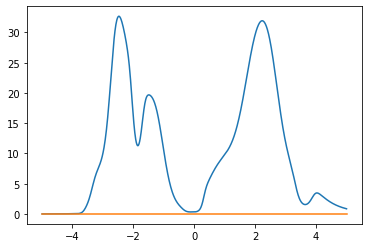

In [39]:
i_orb = 3
j_ap = 15

plt.plot(orblib.x, orblib.y[i_orb,:])
plt.plot(orblib.x, gh_losvds[i_orb, j_ap, :])